<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Определим-все-функции,-которые-мы-будем-использовать" data-toc-modified-id="Определим-все-функции,-которые-мы-будем-использовать-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Определим все функции, которые мы будем использовать</a></span><ul class="toc-item"><li><span><a href="#Введем-функции-рисования-картинок-для-различных-вариантов-обработки-изображений" data-toc-modified-id="Введем-функции-рисования-картинок-для-различных-вариантов-обработки-изображений-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Введем функции рисования картинок для различных вариантов обработки изображений</a></span></li><li><span><a href="#А-теперь-добавим-универсальную-функцию,-которая-сравнивает-все-изображения" data-toc-modified-id="А-теперь-добавим-универсальную-функцию,-которая-сравнивает-все-изображения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>А теперь добавим универсальную функцию, которая сравнивает все изображения</a></span></li></ul></li><li><span><a href="#Умножаем-матрицу-на-транспонированную" data-toc-modified-id="Умножаем-матрицу-на-транспонированную-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножаем матрицу на транспонированную</a></span></li><li><span><a href="#Перед-умножением-матрица-на-транспонированную-нормализауем-по-строкам-и--столбцам" data-toc-modified-id="Перед-умножением-матрица-на-транспонированную-нормализауем-по-строкам-и--столбцам-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Перед умножением матрица на транспонированную нормализауем по строкам и  столбцам</a></span></li><li><span><a href="#Сравниваем-умножение-на-транспонированную--после-нормализации-для-двух-случаев:" data-toc-modified-id="Сравниваем-умножение-на-транспонированную--после-нормализации-для-двух-случаев:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сравниваем умножение на транспонированную  после нормализации для двух случаев:</a></span></li><li><span><a href="#Нормализация-в-диапазоне-от--1-до-1" data-toc-modified-id="Нормализация-в-диапазоне-от--1-до-1-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Нормализация в диапазоне от -1 до 1</a></span></li><li><span><a href="#Универсальная-функция-для-отрисовки-результата-применения-двух-любых-функций-и-разницы-между-этими-изображениями" data-toc-modified-id="Универсальная-функция-для-отрисовки-результата-применения-двух-любых-функций-и-разницы-между-этими-изображениями-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Универсальная функция для отрисовки результата применения двух любых функций и разницы между этими изображениями</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color, img_as_float
# img_as_float переводит имзображение в численное представление
# https://chat.openai.com/share/79755115-6b91-416e-ab70-b069c432674a


from IPython.display import display, Image
# для показывания изображения
# пример использования display(Image('gray_mandrill.png')) 
# нам особо это не нужно, используем imshow
import cv2

# Определим все функции, которые мы будем использовать

In [2]:
# Function to normalize an image
# в результате работы функции все значения ячейки матрицы распологаются от 0 до 1
# функция работает изображением, которое оно тоже воспринимает как матрицу
# функция делает нормализованные монохромные изображения (то есть двумерные массивы) 
# если мы делаем нормализованные трехмерные массивы для цветных изображений, то каждый слой надо нормализовать отдельно
# https://chat.openai.com/share/276a3f57-28a9-45b8-902a-8ddcc7053f4e 

def normalize_image(im):   
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res

def norm_columns(x):
    columns_sums = np.sum(x, axis=0)
    columns_sums[columns_sums == 0] = np.finfo(float).eps
    # Убедимся, что нормализация применяется корректно
    return x / columns_sums[np.newaxis, :]

# поправила norm_rows, а то там появляется деление на ноль
def norm_rows(x):
    row_sums = np.sum(x, axis=1)
    # Замена нулей на очень маленькое число, чтобы избежать деления на ноль
    row_sums[row_sums == 0] = np.finfo(float).eps
    return x / row_sums[:, np.newaxis]

# See https://chat.openai.com/share/d01e5b68-f1f5-403a-9976-1203ad4cd65c 
# for further explanation
# про массивы с ChatGPT https://chat.openai.com/share/403fcfae-85d5-411a-a7f4-363ab0228dcf 

In [3]:
# Это функции обработки изображений

def monochrome(rgb_image):
    coeffs = np.array([0.299, 0.587, 0.114]) #!!! Не переводим элементы вектора в формат unit8
    return rgb_image @ coeffs

def trans_mult(A):
    result = normalize_image(np.dot(monochrome(A), np.transpose(monochrome(A))))
    return result

def trans_mult_norm(A):
    result = normalize_image(np.dot(norm_rows(monochrome(A)), norm_columns(np.transpose(monochrome(A)))))
    return result

def trans_mult_norm_plus_1(A):
    B = A+1
    result = normalize_image(np.dot(norm_rows(monochrome(B)), norm_columns(np.transpose(monochrome(B)))))
    return result

def normalize_image_signed(img):
    img1 = img - np.min(img)
    img2 = (2 / np.max(img1)) * img1
    return img2 - 1


def trans_mult_signed(A):
    B = normalize_image_signed(monochrome(A))
    result = normalize_image(np.dot(B, np.transpose(B)))
    return result

## Введем функции рисования картинок для различных вариантов обработки изображений

In [4]:
#A, В и С тут названия файлов (то есть картинок). А A_name, B_name и C_name - тоже названия, но в виде текста, 
# которые будут в заголовках картинок, получаенных из А, В и С соответсвенно, с помощью функций trans_mult и trans_mult_norm

def trans_mult(A):
    result = normalize_image(np.dot(monochrome(A), np.transpose(monochrome(A))))
    return result

def trans_mult_norm(A):
    result = normalize_image(np.dot(norm_rows(monochrome(A)), norm_columns(np.transpose(monochrome(A)))))
    return result


def picture_trans_mult_norm (A, B, C, A_name, B_name, C_name):
    def delta(A):
        return trans_mult_norm(A) - trans_mult(A)
    
    fig, axes = plt.subplots(4, 3, figsize=(16, 22))
    plt.subplots_adjust(hspace=0.5)

    axes[0,0].imshow(monochrome(A), cmap='gray')
    axes[0,0].set_title(A_name)
    axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    axes[0,1].imshow(monochrome(B), cmap='gray')
    axes[0,1].set_title(B_name)
# Включение сетки
    axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[0,2].imshow(monochrome(C), cmap='gray')
    axes[0,2].set_title(C_name)
    axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    fig.text(0.5, 0.72, 'Сначала делаем умножение на транспонированную, как выше:\n', 
         ha='center', va='center', fontsize=15)


    axes[1,0].imshow(trans_mult(A), cmap='gray')
    axes[1,0].set_title(f'{A_name} after normalisation,\n transposition and multiplication')
    axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[1,1].imshow(trans_mult(B), cmap='gray')
    axes[1,1].set_title(f'{B_name} after normalisation,\n transposition and multiplication')
    axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[1,2].imshow(trans_mult(C), cmap='gray')
    axes[1,2].set_title(f'{C_name} vertical after normalisation,\n transposition and multiplication')
    axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.51, 'Теперь перед умножением сделаем нормализацию по строкам и столбцам'
             'для исходной и транспонированной:\n', 
         ha='center', va='center', fontsize=15)


    axes[2,0].imshow(trans_mult_norm(A), cmap='gray')
    axes[2,0].set_title(f'{A_name} after normalisation,\n transposition and multiplication')
    axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[2,1].imshow(trans_mult_norm(B), cmap='gray')
    axes[2,1].set_title(f'{B_name} after normalisation,\n transposition and multiplication')
    axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[2,2].imshow(trans_mult_norm(C), cmap='gray')
    axes[2,2].set_title(f'{C_name} after normalisation,\n transposition and multiplication')
    axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)



    fig.text(0.5, 0.285, 'Теперь посмотрим delta - разницу между изображениями,\n где делали нормализацию'
             'перед умножением и нет:', 
         ha='center', va='center', fontsize=15)

    axes[3,0].imshow(delta(A), cmap='gray')
    axes[3,0].set_title(f'delta {A_name}')
# Включение сетки
    axes[3,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[3,1].imshow(delta(B), cmap='gray')
    axes[3,1].set_title(f'delta {B_name}')
    axes[3,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,2].imshow(delta(C), cmap='gray')
    axes[3,2].set_title(f'delta {C_name}')
    axes[3,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

# Отображение фигуры с подграфиками
    plt.show()
  


In [5]:
def trans_mult_norm(A):
    result = normalize_image(np.dot(norm_rows(monochrome(A)), norm_columns(np.transpose(monochrome(A)))))
    return result

def trans_mult_norm_plus_1(A):
    B = A+1
    result = normalize_image(np.dot(norm_rows(monochrome(B)), norm_columns(np.transpose(monochrome(B)))))
    return result


#A, В и С тут названия файлов (то есть картинок). А A_name, B_name и C_name - тоже названия, но в виде текста, 
# которые будут в заголовках картинок, получаенных из А, В и С соответсвенно, 
# с помощью функций trans_mult_norm и trans_mult_norm_plus_1

def picture_trans_mult_norm_norm_plus_1 (A, B, C, A_name, B_name, C_name):
    def delta(A):
        return trans_mult_norm_plus_1(A) - trans_mult_norm(A)
    fig, axes = plt.subplots(4, 3, figsize=(16, 22))
    plt.subplots_adjust(hspace=0.5)

    axes[0,0].imshow(monochrome(A), cmap='gray')
    axes[0,0].set_title(A_name)
    axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    


    axes[0,1].imshow(monochrome(B), cmap='gray')
    axes[0,1].set_title(B_name)
    axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
   
    axes[0,2].imshow(monochrome(C), cmap='gray')
    axes[0,2].set_title(C_name)
    axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    
    fig.text(0.5, 0.715, 'Сначала возьмем исходную матрицу,' 
         'нормализуем по строкам и\n умножим на транспонированную, нормализованную по столбцам:\n', 
         ha='center', va='center', fontsize=15)

    axes[1,0].imshow(trans_mult_norm(A), cmap='gray')
    axes[1,0].set_title(f'{A_name} after normalisation,\n transposition and multiplication')
    axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
  

    axes[1,1].imshow(trans_mult_norm(B), cmap='gray')
    axes[1,1].set_title(f'{B_name} after normalisation,\n transposition and multiplication')
    axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
   

    axes[1,2].imshow(trans_mult_norm(C), cmap='gray')
    axes[1,2].set_title(f'{C_name} after normalisation,\n transposition and multiplication')
    axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    

    fig.text(0.5, 0.51, 'Теперь перед нормализацией по строкам и столбцам прибавим к матрице единицу\n', 
         ha='center', va='center', fontsize=15)


    axes[2,0].imshow(trans_mult_norm_plus_1(A), cmap='gray')
    axes[2,0].set_title(f'{A_name} plus 1\n after normalisation,\n transposition and multiplication')
    axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[2,1].imshow(trans_mult_norm_plus_1(B), cmap='gray')
    axes[2,1].set_title(f'{B_name} plus 1\n after normalisation,\n transposition and multiplication')
    axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[2,2].imshow(trans_mult_norm_plus_1(C), cmap='gray')
    axes[2,2].set_title(f'{C_name} plus 1\n after normalisation,\n transposition and multiplication')
    axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

  
    fig.text(0.5, 0.29, 'Теперь посмотрим delta - разницу между изображениями,\n где перед нормализацией прибавляли 1 и нет', 
         ha='center', va='center', fontsize=15)

    axes[3,0].imshow(delta(A), cmap='gray')
    axes[3,0].set_title(f'delta {A_name}')
    axes[3,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,1].imshow(delta(B), cmap='gray')
    axes[3,1].set_title(f'delta {B_name}')
    axes[3,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,2].imshow(delta(C), cmap='gray')
    axes[3,2].set_title(f'delta {C_name}')
    axes[3,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    # Отображение фигуры с подграфиками
    plt.show()


In [6]:

def normalize_image_signed(img):
    img1 = img - np.min(img)
    img2 = (2 / np.max(img1)) * img1
    return img2 - 1


def trans_mult_signed(A):
    B = normalize_image_signed(monochrome(A))
    result = normalize_image(np.dot(B, np.transpose(B)))
    return result

#A, В и С тут названия файлов (то есть картинок). А A_name, B_name и C_name - тоже названия, но в виде текста, 
# которые будут в заголовках картинок, получаенных из А, В и С соответсвенно, 
# с помощью функций trans_mult_norm и trans_mult_norm_signed

def picture_trans_mult_signed (A, B, C, A_name, B_name, C_name):
    def delta(A):
        return trans_mult_signed(A) - trans_mult_norm(A)
    
    fig, axes = plt.subplots(4, 3, figsize=(16, 22))
    plt.subplots_adjust(hspace=0.5)
    axes[0,0].imshow(monochrome(A), cmap='gray')
    axes[0,0].set_title(A_name)
    axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[0,1].imshow(monochrome(B), cmap='gray')
    axes[0,1].set_title(B_name)
    axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[0,2].imshow(monochrome(C), cmap='gray')
    axes[0,2].set_title(C_name)
    axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.715, 'Сначала возьмем исходную матрицу,' 
         'нормализуем по строкам и\n умножим на транспонированную, нормализованную по столбцам:\n', 
         ha='center', va='center', fontsize=15)

    
    axes[1,0].imshow(trans_mult(A), cmap='gray')
    axes[1,0].set_title(f'{A_name} after transposition and multiplication')
    axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[1,1].imshow(trans_mult_norm(B), cmap='gray')
    axes[1,1].set_title(f'{B_name} after transposition and multiplication')
    axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[1,2].imshow(trans_mult_norm(C), cmap='gray')
    axes[1,2].set_title(f'{C_name} after transposition and multiplication')
    axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    
    fig.text(0.5, 0.51, 'Теперь перед транспозицией и умножением нормализуем матрицу от -1 до 1\n', 
         ha='center', va='center', fontsize=15)

    axes[2,0].imshow(trans_mult_signed(A), cmap='gray')
    axes[2,0].set_title(f'{A_name} after signed transposition and multiplication')
    axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[2,1].imshow(trans_mult_signed(B), cmap='gray')
    axes[2,1].set_title(f'{B_name} delta between different normalisation')
    axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[2,2].imshow(trans_mult_signed(C), cmap='gray')
    axes[2,2].set_title(f'{C_name} after signed transposition and multiplication')
    axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.29, 'Теперь посмотрим delta - разницу между изображениями с разной нормализацией\n', 
         ha='center', va='center', fontsize=15)

    axes[3,0].imshow(delta(A), cmap='gray')
    axes[3,0].set_title(f'delta {A_name}')
    axes[3,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,1].imshow(delta(B), cmap='gray')
    axes[3,1].set_title(f'delta {B_name}')
    axes[3,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,2].imshow(delta(C), cmap='gray')
    axes[3,2].set_title(f'delta {C_name}')
    axes[3,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    # Отображение фигуры с подграфиками
    plt.show()



## А теперь добавим универсальную функцию, которая сравнивает все изображения

In [7]:
# тут буду править, потом уберу предыдущий


# wrap_text - это специальная функция переноса текста на новую строку, если он превышает max_length символов.
# Она будет использоваться для переноса заголовкой в функции picture_f_1_and_f_2
   
def wrap_text(text, max_length):
   
    if len(text) <= max_length:
        return text
    # Находим пробел ближайший к середине строки для красивого переноса
    split_points = [i for i, char in enumerate(text) if char == ' ']
    best_split = min(split_points, key=lambda x: abs(x - max_length))
    return text[:best_split] + '\n' + wrap_text(text[best_split+1:], max_length)


# f_1 и f_2 тут названия функций, с помощью которых мы преобразуем картинки А, В и С
# f_1_name и  f_2_name - наименования функций, которые должны появиться в заголовках
#A, В и С тут названия файлов (то есть картинок). А A_name, B_name и C_name - тоже названия, но в виде текста, 
# которые будут в заголовках картинок, получаенных из А, В и С соответсвенно.


def picture_f_1_and_f_2 (f_1, f_2, f_1_name, f_2_name, A, B, C, A_name, B_name, C_name):
    def delta(A):
        return f_2(A) - f_1(A)
    
    fig, axes = plt.subplots(4, 3, figsize=(16, 22))
    
    plt.subplots_adjust(hspace=0.5)
    axes[0,0].imshow(monochrome(A), cmap='gray')
    axes[0,0].set_title(A_name)
    axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[0,1].imshow(monochrome(B), cmap='gray')
    axes[0,1].set_title(B_name)
    axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[0,2].imshow(monochrome(C), cmap='gray')
    axes[0,2].set_title(C_name)
    axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.715, f'Pictures after {f_1_name}\n', 
         ha='center', va='center', fontsize=15)

    
    axes[1,0].imshow(f_1(A), cmap='gray')
    axes[1,0].set_title(wrap_text(f'{A_name} after \n{f_1_name}', 45))
    axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[1,1].imshow(f_1(B), cmap='gray')
    axes[1,1].set_title(wrap_text(f'{B_name} after \n{f_1_name}', 45))
    axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[1,2].imshow(f_1(C), cmap='gray')
    axes[1,2].set_title(wrap_text(f'{C_name} after \n{f_1_name}', 45))
    axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    
    fig.text(0.5, 0.51, f'Pictures after {f_2_name}\n', 
         ha='center', va='center', fontsize=15)

    axes[2,0].imshow(f_2(A), cmap='gray')
    axes[2,0].set_title(wrap_text(f'{A_name} after \n{f_2_name}', 45))
    axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[2,1].imshow(f_2(B), cmap='gray')
    axes[2,1].set_title(wrap_text(f'{B_name} after \n{f_2_name}', 45))
    axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[2,2].imshow(f_2(C), cmap='gray')
    axes[2,2].set_title(wrap_text(f'{C_name} after \n{f_2_name}', 45))
    axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.29, wrap_text(f'Here is delta  -  difference between the image processing results of functions\n'
             f'{f_1_name} and {f_2_name}', 200),
         ha='center', va='center', fontsize=15)

    axes[3,0].imshow(delta(A), cmap='gray')
    axes[3,0].set_title(f'delta {A_name}')
    axes[3,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,1].imshow(delta(B), cmap='gray')
    axes[3,1].set_title(f'delta {B_name}')
    axes[3,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,2].imshow(delta(C), cmap='gray')
    axes[3,2].set_title(f'delta {C_name}')
    axes[3,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    # Отображение фигуры с подграфиками
    plt.show()



# Умножаем матрицу на транспонированную
Этот раздел сделан без функций. В принципе его можно вообще убрать, в функции picture_trans_mult_norm это все есть

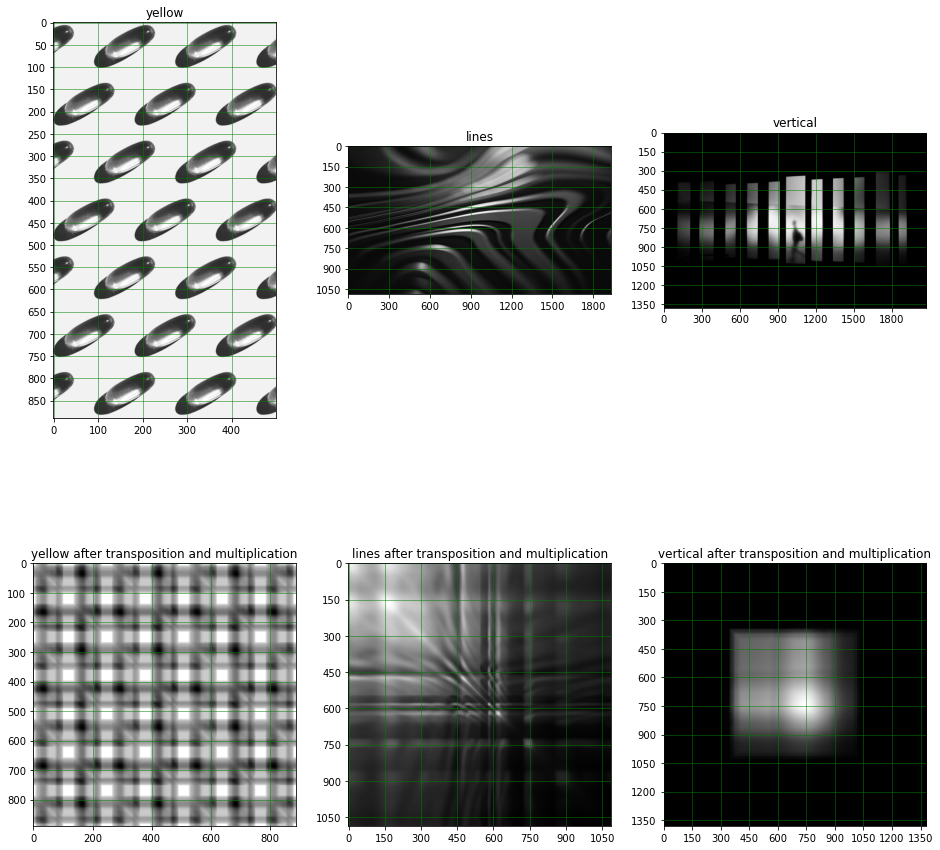

In [8]:
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
lines = io.imread('https://images.unsplash.com/photo-1704520355609-c62b0c4010df?q=80&w=1932&auto=format'
                  '&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')


fig, axes = plt.subplots(2, 3, figsize=(16, 16))

axes[0,0].imshow(monochrome(yellow), cmap='gray')
axes[0,0].set_title('yellow')
# Включение сетки
axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,0].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y


axes[0,1].imshow(monochrome(lines), cmap='gray')
axes[0,1].set_title('lines')
# Включение сетки
axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_xticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,1].set_yticks(range(0, lines.shape[0], 150))  # Настройка делений сетки по оси Y

axes[0,2].imshow(monochrome(vertical), cmap='gray')
axes[0,2].set_title('vertical')
# Включение сетки
axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,2].set_xticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,2].set_yticks(range(0, vertical.shape[0], 150))  # Настройка делений сетки по оси Y


axes[1,0].imshow(trans_mult(yellow), cmap='gray')
axes[1,0].set_title('yellow after transposition and multiplication')
# Включение сетки
axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


axes[1,1].imshow(trans_mult(lines), cmap='gray')
axes[1,1].set_title('lines after transposition and multiplication')
# Включение сетки
axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_xticks(range(0, lines.shape[0], 150))  # Настройка делений сетки по оси X
axes[1,1].set_yticks(range(0, lines.shape[0], 150))  # Настройка делений сетки по оси Y

axes[1,2].imshow(trans_mult(vertical), cmap='gray')
axes[1,2].set_title('vertical after transposition and multiplication')
# Включение сетки
axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,2].set_xticks(range(0, vertical.shape[0], 150))  # Настройка делений сетки по оси X
axes[1,2].set_yticks(range(0, vertical.shape[0], 150))  # Настройка делений сетки по оси Y


# Отображение фигуры с подграфиками
plt.show()


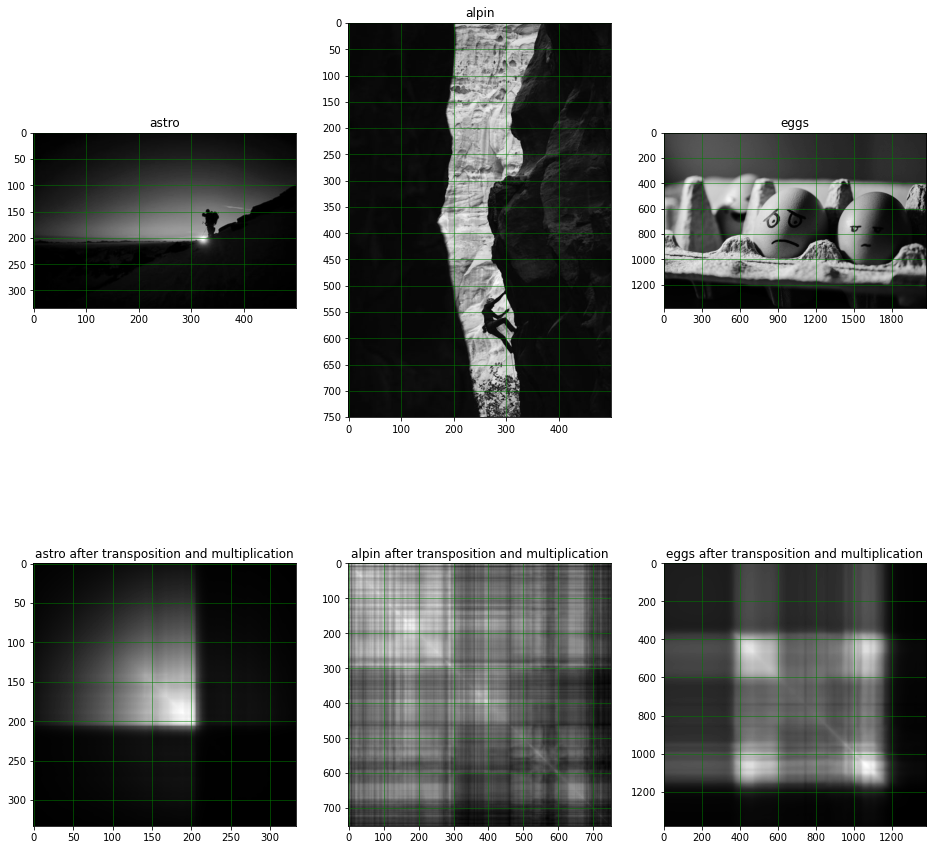

In [9]:
astro = io.imread('https://images.unsplash.com/photo-1707162798192-b32a573ca3a8?w=500&auto=format&fit=crop&q=60&ixlib='
                  'rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxMHx8fGVufDB8fHx8fA%3D%3D')

alpin = io.imread('https://images.unsplash.com/photo-1683009427041-d810728a7cb6?w=500&auto=format&fit=crop&q='
                 '60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxlZGl0b3JpYWwtZmVlZHw2fHx8ZW58MHx8fHx8')
eggs = io.imread('https://images.unsplash.com/photo-1617440168937-c6497eaa8db5?q=80&w=2070&auto'
                '=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')


fig, axes = plt.subplots(2, 3, figsize=(16, 16))

axes[0,0].imshow(monochrome(astro), cmap='gray')
axes[0,0].set_title('astro')
# Включение сетки
axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_xticks(range(0, astro.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,0].set_yticks(range(0, astro.shape[0], 50))  # Настройка делений сетки по оси Y


axes[0,1].imshow(monochrome(alpin), cmap='gray')
axes[0,1].set_title('alpin')
# Включение сетки
axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_xticks(range(0, alpin.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,1].set_yticks(range(0, alpin.shape[0], 50))  # Настройка делений сетки по оси Y

axes[0,2].imshow(monochrome(eggs), cmap='gray')
axes[0,2].set_title('eggs')
# Включение сетки
axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,2].set_xticks(range(0, eggs.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,2].set_yticks(range(0, eggs.shape[0], 200))  # Настройка делений сетки по оси Y


axes[1,0].imshow(trans_mult(astro), cmap='gray')
axes[1,0].set_title('astro after transposition and multiplication')
# Включение сетки
axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


axes[1,1].imshow(trans_mult(alpin), cmap='gray')
axes[1,1].set_title('alpin after transposition and multiplication')
# Включение сетки
axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


axes[1,2].imshow(trans_mult(eggs), cmap='gray')
axes[1,2].set_title('eggs after transposition and multiplication')
# Включение сетки
axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


# Отображение фигуры с подграфиками
plt.show()


# Перед умножением матрица на транспонированную нормализауем по строкам и  столбцам

In [10]:
def trans_mult_norm(A):
    result = normalize_image(np.dot(norm_rows(monochrome(A)), norm_columns(np.transpose(monochrome(A)))))
    return result

**Рассмотрим и сравним изображения для двух случаев**:
- просто умножение матрицы на транспонированную (что мы делали выше);
- когда перед умножением исходная матрица нормализована по строкам, а транспонированная - по столбцам;


представим обработанные изображения в виде трех строк:
- матрица, умноженная на транспонированную
- когда перед умножением исходная матрица нормализована по строкам, а транспонированная - по столбцам;
- разница между изображениями

In [11]:
def picture_trans_mult_norm (A,B,C,A_name, B_name, C_name):
    def delta(A):
        return trans_mult_norm(A) - trans_mult(A)
    
    fig, axes = plt.subplots(4, 3, figsize=(16, 22))
    plt.subplots_adjust(hspace=0.5)

    axes[0,0].imshow(monochrome(A), cmap='gray')
    axes[0,0].set_title(A_name)
# Включение сетки
    axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    axes[0,1].imshow(monochrome(B), cmap='gray')
    axes[0,1].set_title(B_name)
# Включение сетки
    axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[0,2].imshow(monochrome(C), cmap='gray')
    axes[0,2].set_title(C_name)
# Включение сетки
    axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    fig.text(0.5, 0.72, 'Сначала делаем умножение на транспонированную, как выше:\n', 
         ha='center', va='center', fontsize=15)


    axes[1,0].imshow(trans_mult(A), cmap='gray')
    axes[1,0].set_title(f'{A_name} after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[1,1].imshow(trans_mult(B), cmap='gray')
    axes[1,1].set_title(f'{B_name} after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[1,2].imshow(trans_mult(C), cmap='gray')
    axes[1,2].set_title(f'{C_name} vertical after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.51, 'Теперь перед умножением сделаем нормализацию по строкам и столбцам'
             'для исходной и транспонированной:\n', 
         ha='center', va='center', fontsize=15)


    axes[2,0].imshow(trans_mult_norm(A), cmap='gray')
    axes[2,0].set_title(f'{A_name} after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[2,1].imshow(trans_mult_norm(B), cmap='gray')
    axes[2,1].set_title(f'{B_name} after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[2,2].imshow(trans_mult_norm(C), cmap='gray')
    axes[2,2].set_title(f'{C_name} after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)



    fig.text(0.5, 0.285, 'Теперь посмотрим delta - разницу между изображениями,\n где делали нормализацию'
             'перед умножением и нет:', 
         ha='center', va='center', fontsize=15)

    axes[3,0].imshow(delta(A), cmap='gray')
    axes[3,0].set_title(f'delta {A_name}')
# Включение сетки
    axes[3,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[3,1].imshow(delta(B), cmap='gray')
    axes[3,1].set_title(f'delta {B_name}')
# Включение сетки
    axes[3,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,2].imshow(delta(C), cmap='gray')
    axes[3,2].set_title(f'delta {C_name}')
# Включение сетки
    axes[3,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

# Отображение фигуры с подграфиками
    plt.show()
  


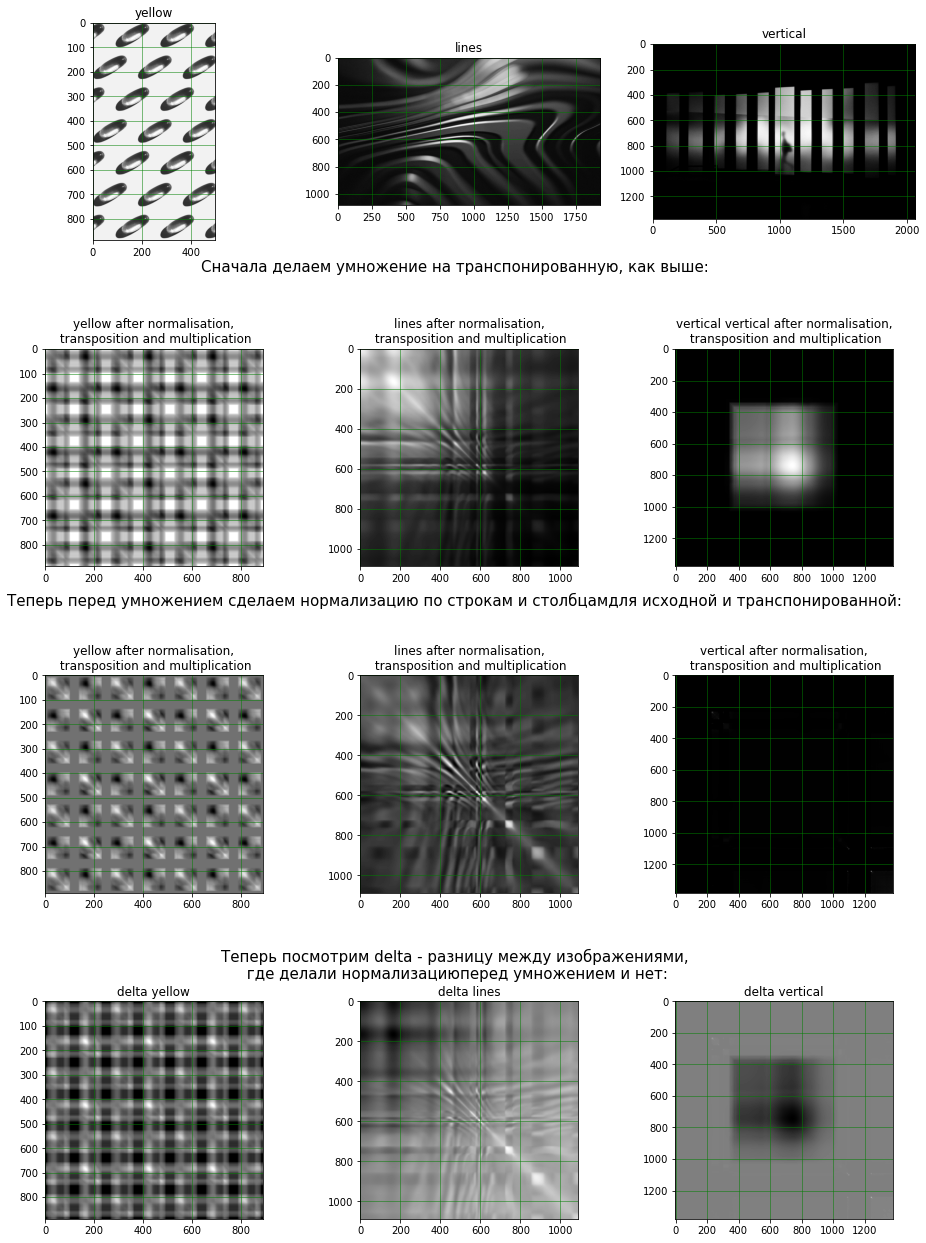

In [12]:
# это сделаем функцию
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
lines = io.imread('https://images.unsplash.com/photo-1704520355609-c62b0c4010df?q=80&w=1932&auto=format'
                  '&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
picture_trans_mult_norm (yellow, lines, vertical ,'yellow', 'lines', 'vertical')

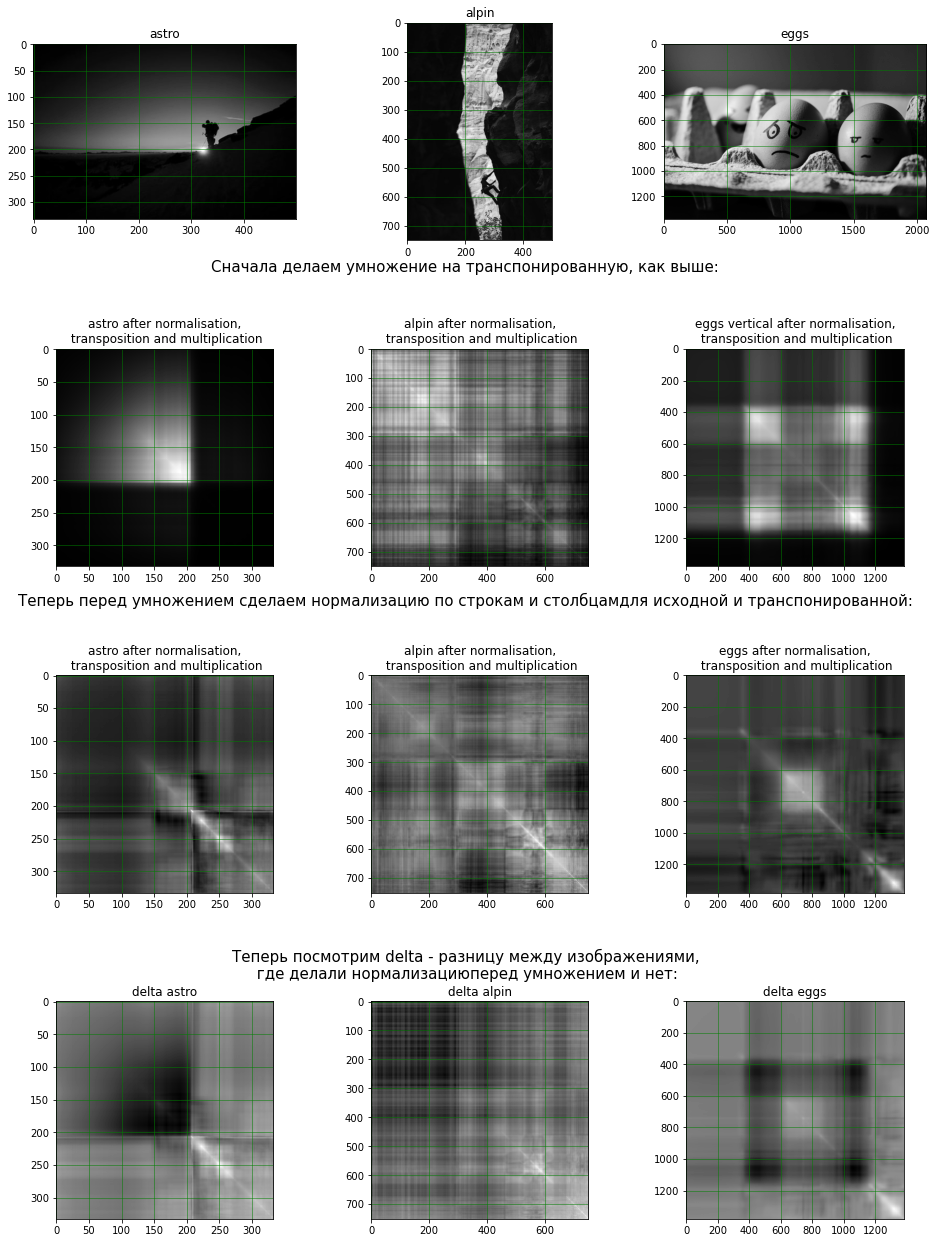

In [13]:
astro = io.imread('https://images.unsplash.com/photo-1707162798192-b32a573ca3a8?w=500&auto=format&fit=crop&q=60&ixlib='
                  'rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxMHx8fGVufDB8fHx8fA%3D%3D')

alpin = io.imread('https://images.unsplash.com/photo-1683009427041-d810728a7cb6?w=500&auto=format&fit=crop&q='
                 '60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxlZGl0b3JpYWwtZmVlZHw2fHx8ZW58MHx8fHx8')
eggs = io.imread('https://images.unsplash.com/photo-1617440168937-c6497eaa8db5?q=80&w=2070&auto'
                '=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

picture_trans_mult_norm (astro, alpin, eggs ,'astro', 'alpin', 'eggs')

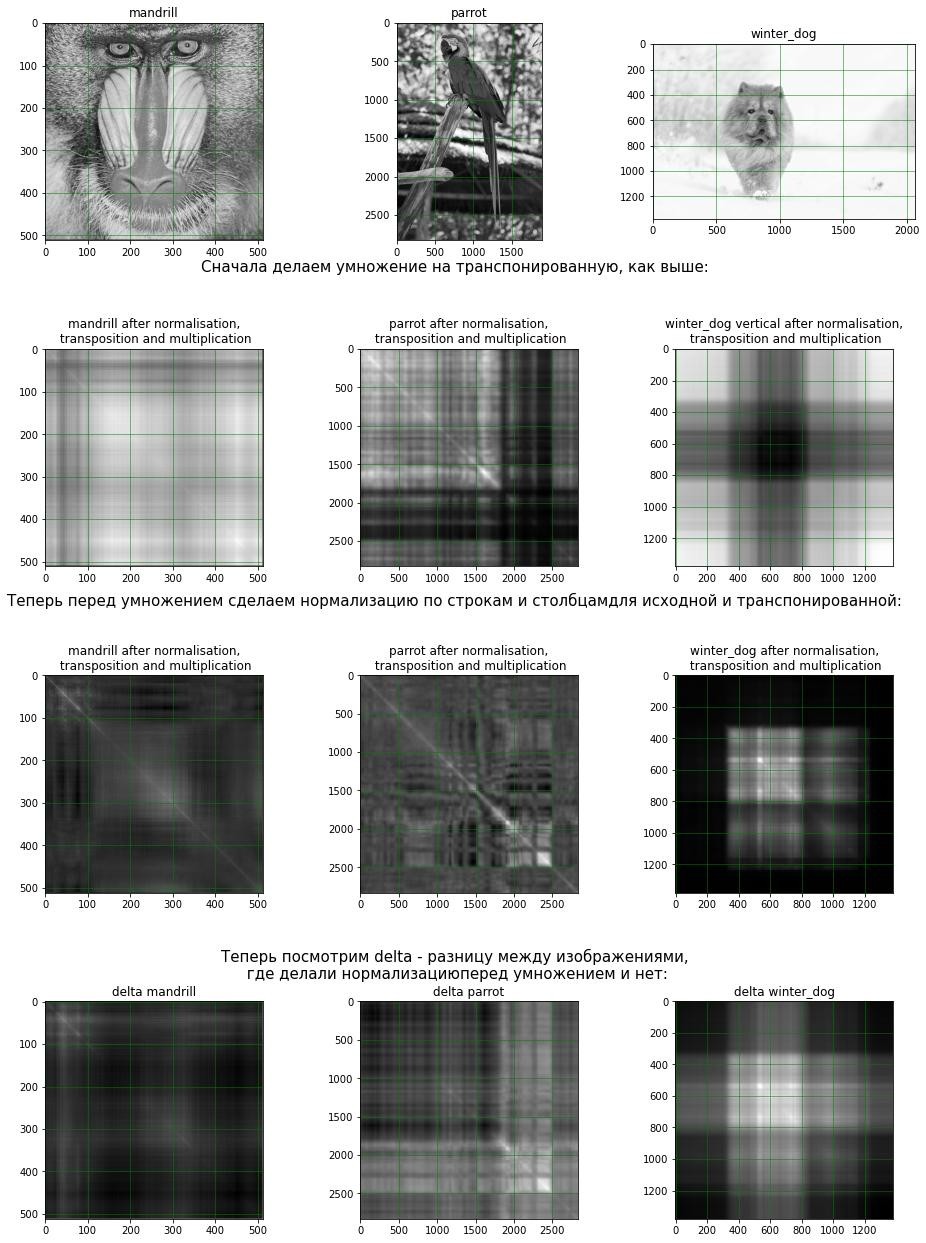

In [14]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")

parrot = io.imread('https://images.unsplash.com/photo-1534567059665-cbcfe2e73b91?q=80&w=1887&auto=format&fit=crop&ixlib='
                   'rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

winter_dog = io.imread('https://images.unsplash.com/photo-1678357437275-a4016d7faafd?q=80&w=2070&auto=format&fit=crop&ixlib'
                       '=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

picture_trans_mult_norm (mandrill, parrot, winter_dog ,'mandrill', 'parrot', 'winter_dog')

#  Сравниваем умножение на транспонированную  после нормализации для двух случаев:
- Просто нормализуем исхордную матрицу по строкам и умножаем на транспонированную матрицу, которую мы нормализорвали по столбцам (как в пункте выше). 
- Перед нормализацией добавляем к матрице единицу (любопытный вопрос, почему мы выбрали вот такую формулу????) 
- третья сторка - разница между изображениями

In [15]:
def trans_mult_norm_plus_1(A):
    B = A+1
    result = normalize_image(np.dot(norm_rows(monochrome(B)), norm_columns(np.transpose(monochrome(B)))))
    return result

def trans_mult_norm(A):
    result = normalize_image(np.dot(norm_rows(monochrome(A)), norm_columns(np.transpose(monochrome(A)))))
    return result


def picture_trans_mult_norm_norm_plus_1 (A, B, C, A_name, B_name, C_name):
    def delta(A):
        return trans_mult_norm_plus_1(A) - trans_mult_norm(A)
    fig, axes = plt.subplots(4, 3, figsize=(16, 22))
    plt.subplots_adjust(hspace=0.5)

    axes[0,0].imshow(monochrome(A), cmap='gray')
    axes[0,0].set_title(A_name)
# Включение сетки
    axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    


    axes[0,1].imshow(monochrome(B), cmap='gray')
    axes[0,1].set_title(B_name)
# Включение сетки
    axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
   
    axes[0,2].imshow(monochrome(C), cmap='gray')
    axes[0,2].set_title(C_name)
# Включение сетки
    axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    
    fig.text(0.5, 0.715, 'Сначала возьмем исходную матрицу,' 
         'нормализуем по строкам и\n умножим на транспонированную, нормализованную по столбцам:\n', 
         ha='center', va='center', fontsize=15)

    axes[1,0].imshow(trans_mult_norm(A), cmap='gray')
    axes[1,0].set_title(f'{A_name} after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
  

    axes[1,1].imshow(trans_mult_norm(B), cmap='gray')
    axes[1,1].set_title(f'{B_name} after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
   

    axes[1,2].imshow(trans_mult_norm(C), cmap='gray')
    axes[1,2].set_title(f'{C_name} after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    

    fig.text(0.5, 0.51, 'Теперь перед нормализацией по строкам и столбцам прибавим к матрице единицу\n', 
         ha='center', va='center', fontsize=15)


    axes[2,0].imshow(trans_mult_norm_plus_1(A), cmap='gray')
    axes[2,0].set_title(f'{A_name} plus 1\n after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[2,1].imshow(trans_mult_norm_plus_1(B), cmap='gray')
    axes[2,1].set_title(f'{B_name} plus 1\n after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[2,2].imshow(trans_mult_norm_plus_1(C), cmap='gray')
    axes[2,2].set_title(f'{C_name} plus 1\n after normalisation,\n transposition and multiplication')
# Включение сетки
    axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

  


    fig.text(0.5, 0.29, 'Теперь посмотрим delta - разницу между изображениями,\n где перед нормализацией прибавляли 1 и нет', 
         ha='center', va='center', fontsize=15)

    axes[3,0].imshow(delta(A), cmap='gray')
    axes[3,0].set_title(f'delta {A_name}')
# Включение сетки
    axes[3,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,1].imshow(delta(B), cmap='gray')
    axes[3,1].set_title(f'delta {B_name}')
# Включение сетки
    axes[3,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,2].imshow(delta(C), cmap='gray')
    axes[3,2].set_title(f'delta {C_name}')
# Включение сетки
    axes[3,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    # Отображение фигуры с подграфиками
    plt.show()


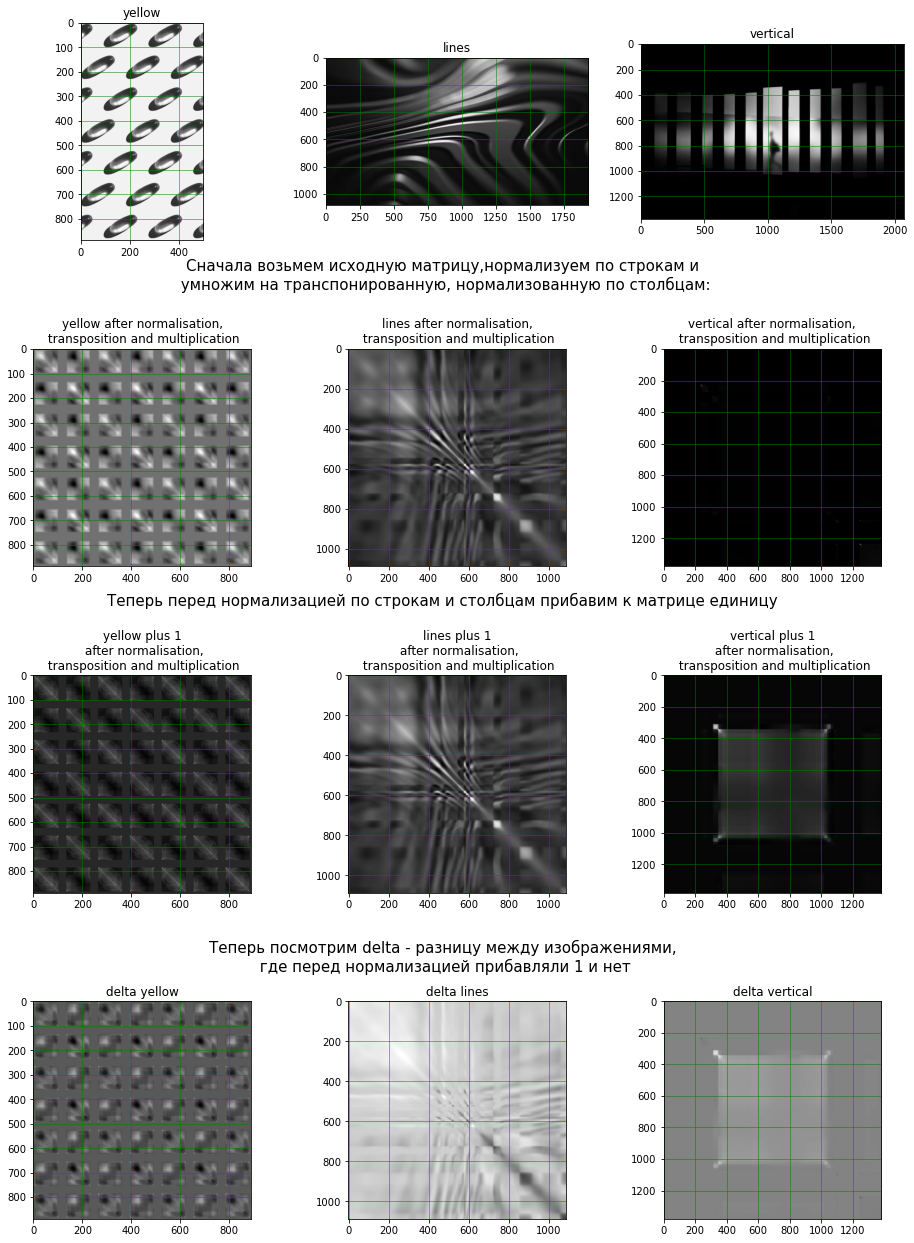

In [16]:
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
lines = io.imread('https://images.unsplash.com/photo-1704520355609-c62b0c4010df?q=80&w=1932&auto=format'
                  '&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

picture_trans_mult_norm_norm_plus_1 (yellow, lines, vertical, 'yellow', 'lines', 'vertical')

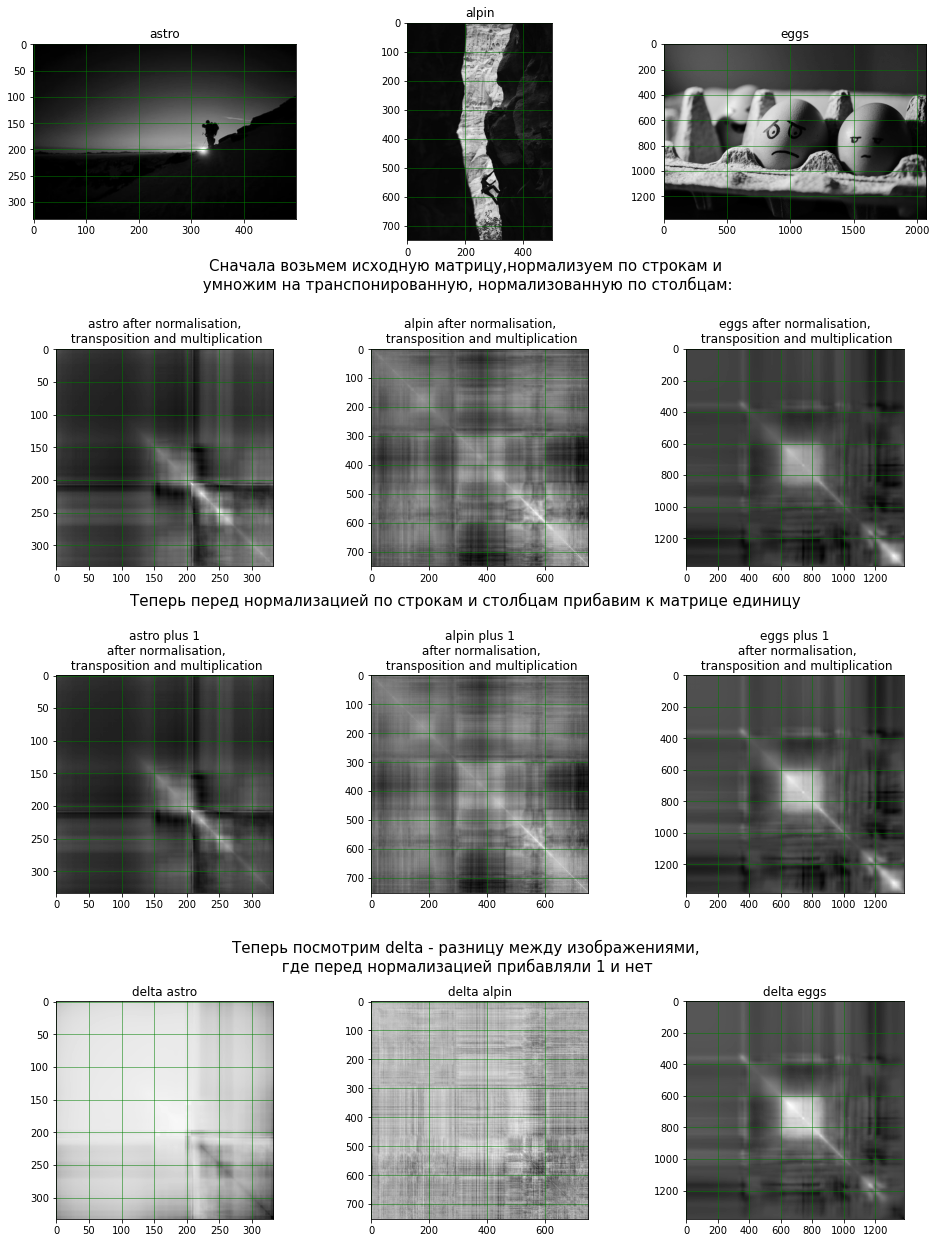

In [17]:
astro = io.imread('https://images.unsplash.com/photo-1707162798192-b32a573ca3a8?w=500&auto=format&fit=crop&q=60&ixlib='
                  'rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxMHx8fGVufDB8fHx8fA%3D%3D')

alpin = io.imread('https://images.unsplash.com/photo-1683009427041-d810728a7cb6?w=500&auto=format&fit=crop&q='
                 '60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxlZGl0b3JpYWwtZmVlZHw2fHx8ZW58MHx8fHx8')
eggs = io.imread('https://images.unsplash.com/photo-1617440168937-c6497eaa8db5?q=80&w=2070&auto'
                '=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

picture_trans_mult_norm_norm_plus_1 (astro, alpin, eggs, 'astro', 'alpin', 'eggs')

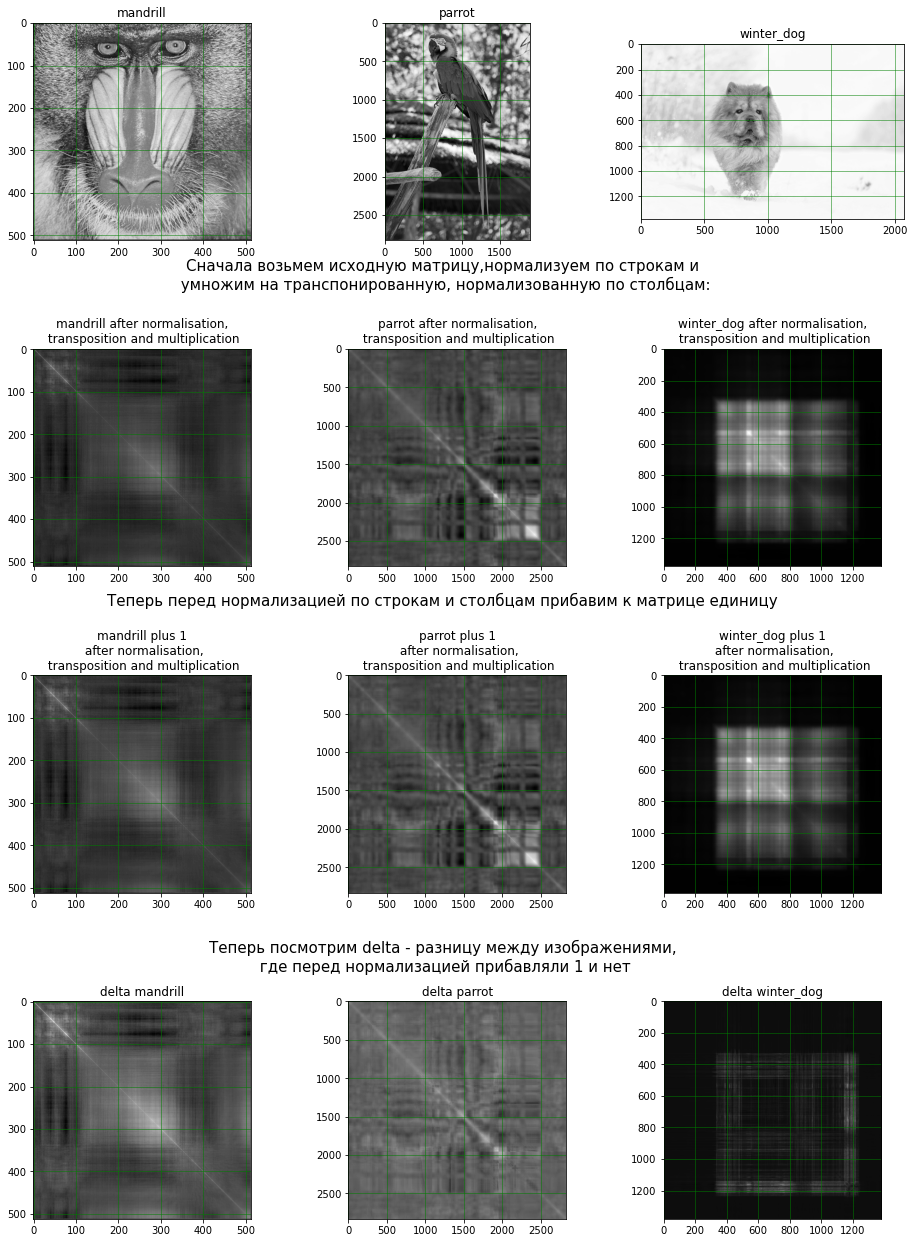

In [18]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")

parrot = io.imread('https://images.unsplash.com/photo-1534567059665-cbcfe2e73b91?q=80&w=1887&auto=format&fit=crop&ixlib='
                   'rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

winter_dog = io.imread('https://images.unsplash.com/photo-1678357437275-a4016d7faafd?q=80&w=2070&auto=format&fit=crop&ixlib'
                       '=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

picture_trans_mult_norm_norm_plus_1 (mandrill, parrot, winter_dog, 'mandrill', 'parrot', 'winter_dog')

# Нормализация в диапазоне от -1 до 1
Попробуем другой вариант нормализации, где пиксели принимают диапазон от - 1 до 1.
как вот здесь для Julia (https://github.com/anhinga/JuliaCon2021-poster/tree/main/signed-normalization) 

Здесь будем сравнивать три варианта изображений (плюс к исходному):
- матрица, нормализованная по стпрокам, умноженная на матрицу, нормализованную по столбцам
- материца, нормализованная от -1 до +1
- разница между изображениями

In [19]:
def normalize_image_signed(img):
    img1 = img - np.min(img)
    img2 = (2 / np.max(img1)) * img1
    return img2 - 1


def trans_mult_signed(A):
    B = normalize_image_signed(monochrome(A))
    result = normalize_image(np.dot(B, np.transpose(B)))
    return result

def picture_trans_mult_signed (A, B, C, A_name, B_name, C_name):
    def delta(A):
        return trans_mult_signed(A) - trans_mult_norm(A)
    
    fig, axes = plt.subplots(4, 3, figsize=(16, 22))
    plt.subplots_adjust(hspace=0.5)
    axes[0,0].imshow(monochrome(A), cmap='gray')
    axes[0,0].set_title(A_name)
# Включение сетки
    axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[0,1].imshow(monochrome(B), cmap='gray')
    axes[0,1].set_title(B_name)
# Включение сетки
    axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[0,2].imshow(monochrome(C), cmap='gray')
    axes[0,2].set_title(C_name)
# Включение сетки
    axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.715, 'Сначала возьмем исходную матрицу,' 
         'нормализуем по строкам и\n умножим на транспонированную, нормализованную по столбцам:\n', 
         ha='center', va='center', fontsize=15)

    
    axes[1,0].imshow(trans_mult(A), cmap='gray')
    axes[1,0].set_title(f'{A_name} after transposition and multiplication')
# Включение сетки
    axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[1,1].imshow(trans_mult_norm(B), cmap='gray')
    axes[1,1].set_title(f'{B_name} after transposition and multiplication')
# Включение сетки
    axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[1,2].imshow(trans_mult_norm(C), cmap='gray')
    axes[1,2].set_title(f'{C_name} after transposition and multiplication')
# Включение сетки
    axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    
    fig.text(0.5, 0.51, 'Теперь перед транспозицией и умножением нормализуем матрицу от -1 до 1\n', 
         ha='center', va='center', fontsize=15)

    axes[2,0].imshow(trans_mult_signed(A), cmap='gray')
    axes[2,0].set_title(f'{A_name} after signed transposition and multiplication')
# Включение сетки
    axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[2,1].imshow(trans_mult_signed(B), cmap='gray')
    axes[2,1].set_title(f'{B_name} delta between different normalisation')
# Включение сетки
    axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[2,2].imshow(trans_mult_signed(C), cmap='gray')
    axes[2,2].set_title(f'{C_name} after signed transposition and multiplication')
# Включение сетки
    axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.29, 'Теперь посмотрим delta - разницу между изображениями с разной нормализацией\n', 
         ha='center', va='center', fontsize=15)

    axes[3,0].imshow(delta(A), cmap='gray')
    axes[3,0].set_title(f'delta {A_name}')
# Включение сетки
    axes[3,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,1].imshow(delta(B), cmap='gray')
    axes[3,1].set_title(f'delta {B_name}')
# Включение сетки
    axes[3,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,2].imshow(delta(C), cmap='gray')
    axes[3,2].set_title(f'delta {C_name}')
# Включение сетки
    axes[3,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    # Отображение фигуры с подграфиками
    plt.show()



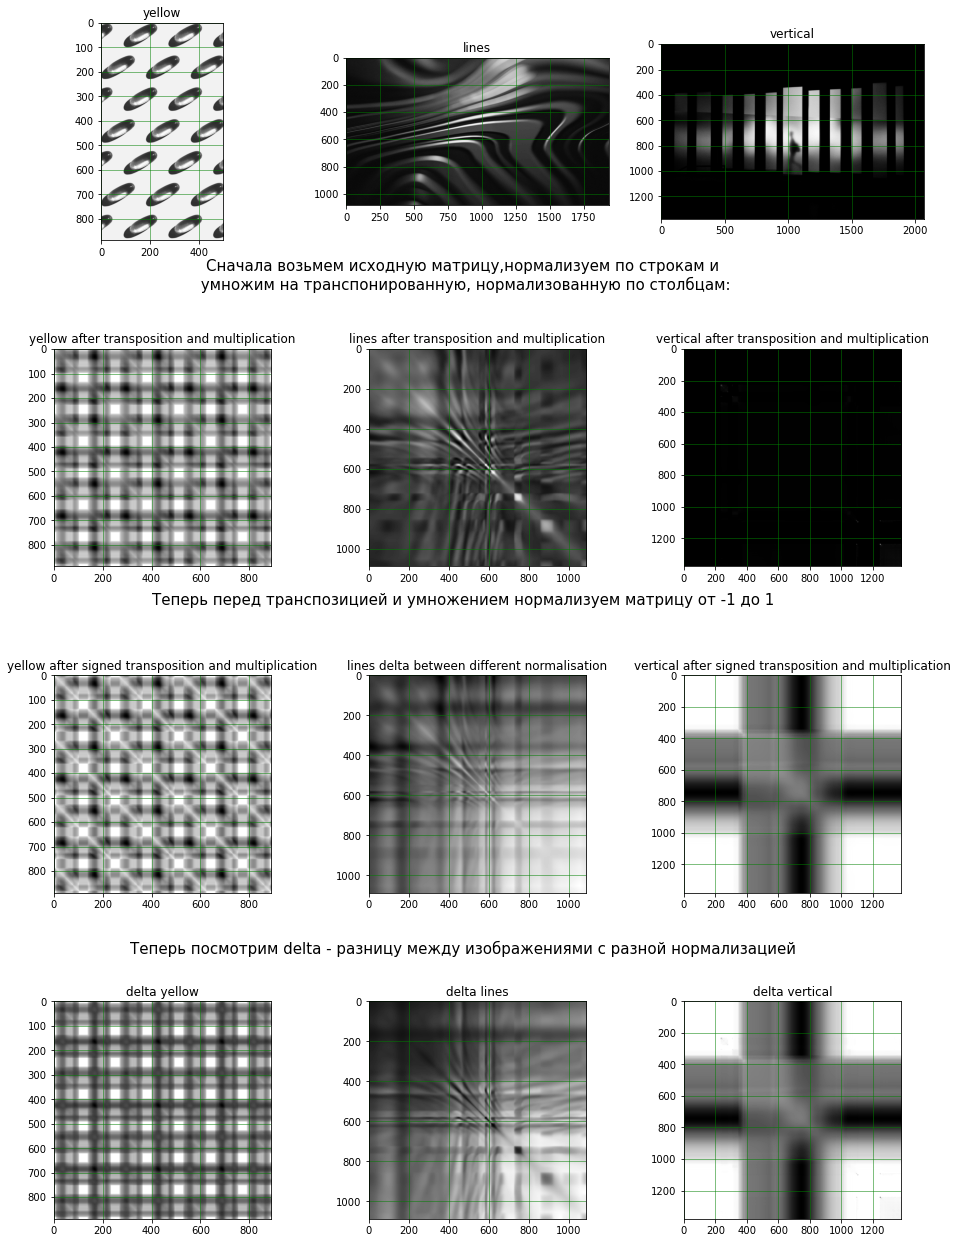

In [20]:
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
lines = io.imread('https://images.unsplash.com/photo-1704520355609-c62b0c4010df?q=80&w=1932&auto=format'
                  '&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
picture_trans_mult_signed (yellow, lines, vertical, 'yellow', 'lines', 'vertical')

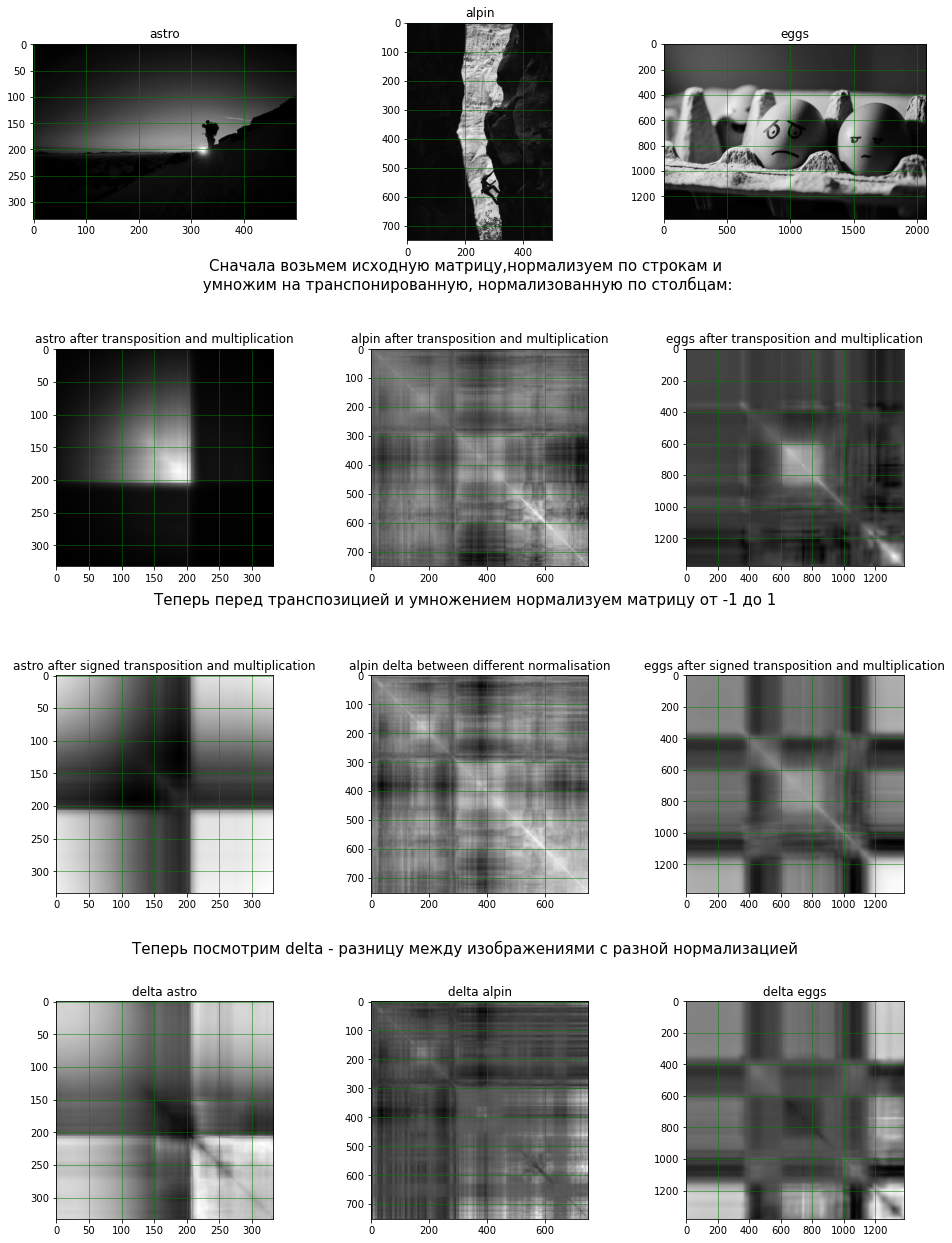

In [21]:
astro = io.imread('https://images.unsplash.com/photo-1707162798192-b32a573ca3a8?w=500&auto=format&fit=crop&q=60&ixlib='
                  'rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxMHx8fGVufDB8fHx8fA%3D%3D')

alpin = io.imread('https://images.unsplash.com/photo-1683009427041-d810728a7cb6?w=500&auto=format&fit=crop&q='
                 '60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxlZGl0b3JpYWwtZmVlZHw2fHx8ZW58MHx8fHx8')
eggs = io.imread('https://images.unsplash.com/photo-1617440168937-c6497eaa8db5?q=80&w=2070&auto'
                '=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

picture_trans_mult_signed(astro, alpin, eggs, 'astro', 'alpin', 'eggs')

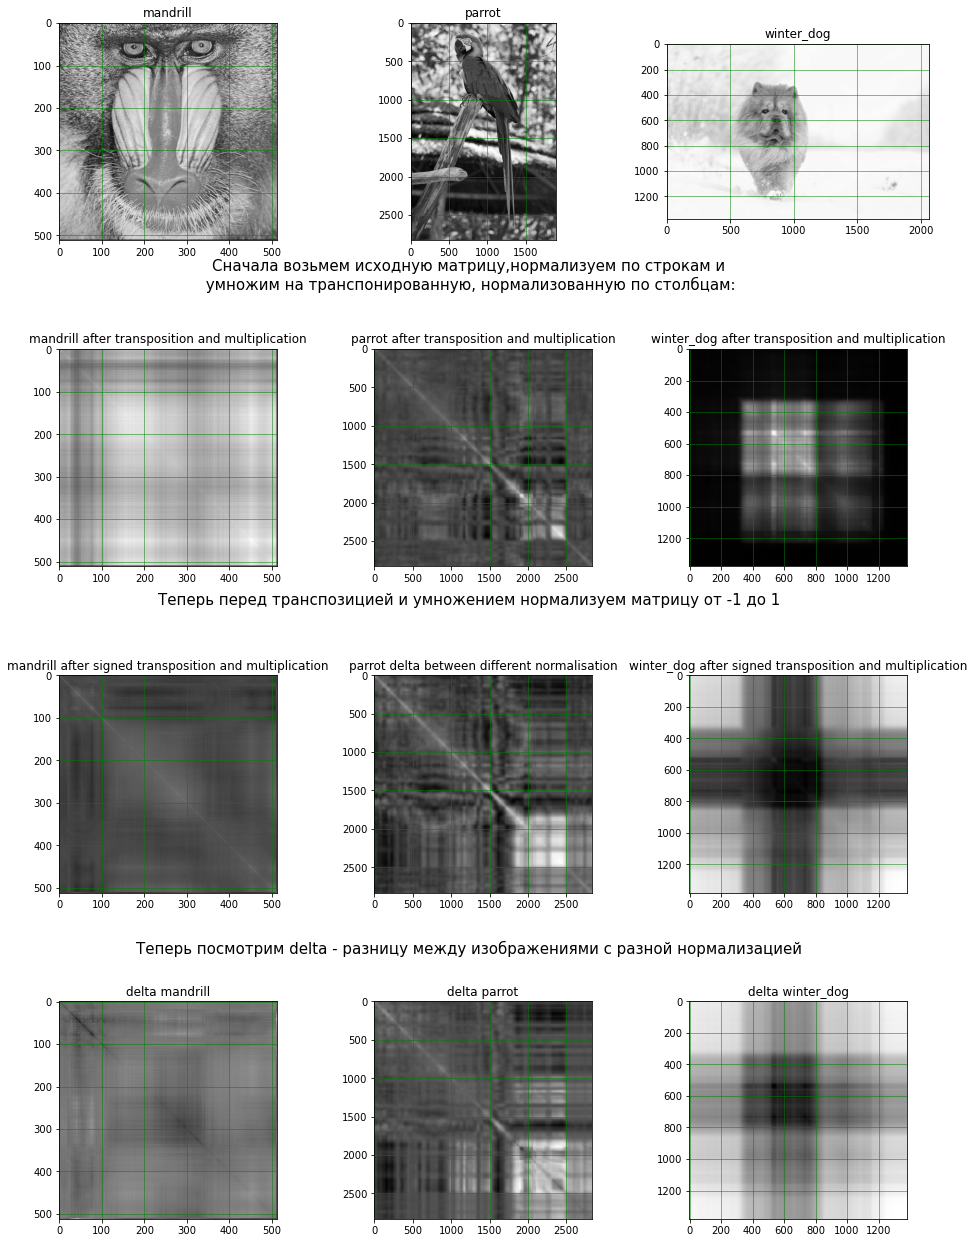

In [22]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")

parrot = io.imread('https://images.unsplash.com/photo-1534567059665-cbcfe2e73b91?q=80&w=1887&auto=format&fit=crop&ixlib='
                   'rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

winter_dog = io.imread('https://images.unsplash.com/photo-1678357437275-a4016d7faafd?q=80&w=2070&auto=format&fit=crop&ixlib'
                       '=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

picture_trans_mult_signed(mandrill, parrot, winter_dog, 'mandrill', 'parrot', 'winter_dog')

# Универсальная функция для отрисовки результата применения двух любых функций и разницы между этими изображениями

Попробуем сделать функцию, которая показывает преобразование картинок двумя любыми функциями и разницу между ними.
То есть пусть у нас есть функции f_1 и f_2, которые преобразуют изображение. Нам нужна функция, которая сделает нам четыре ряда картинок:
- исходные картинки после перевода в монохром
- f_1 от картинок
- f_2 от картинок
- разницу между f_1 и f_2

In [23]:
# специальная фугнкци, если он превышает max_length символов.
   
def wrap_text(text, max_length):
   
    if len(text) <= max_length:
        return text
    # Находим пробел ближайший к середине строки для красивого переноса
    split_points = [i for i, char in enumerate(text) if char == ' ']
    best_split = min(split_points, key=lambda x: abs(x - max_length))
    return text[:best_split] + '\n' + wrap_text(text[best_split+1:], max_length)


def picture_f_1_and_f_2 (f_1, f_2, f_1_name, f_2_name, A, B, C, A_name, B_name, C_name):
    def delta(A):
        return f_2(A) - f_1(A)
    
    fig, axes = plt.subplots(4, 3, figsize=(16, 22))
    plt.subplots_adjust(hspace=0.5)
    axes[0,0].imshow(monochrome(A), cmap='gray')
    axes[0,0].set_title(A_name)
# Включение сетки
    axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[0,1].imshow(monochrome(B), cmap='gray')
    axes[0,1].set_title(B_name)
# Включение сетки
    axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[0,2].imshow(monochrome(C), cmap='gray')
    axes[0,2].set_title(C_name)
# Включение сетки
    axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.715, f'Pictures after {f_1_name}\n', 
         ha='center', va='center', fontsize=15)

    
    axes[1,0].imshow(f_1(A), cmap='gray')
    axes[1,0].set_title(wrap_text(f'{A_name} after \n{f_1_name}', 45))
# Включение сетки
    axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    axes[1,1].imshow(f_1(B), cmap='gray')
    axes[1,1].set_title(wrap_text(f'{B_name} after \n{f_1_name}', 45))
# Включение сетки
    axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[1,2].imshow(f_1(C), cmap='gray')
    axes[1,2].set_title(wrap_text(f'{C_name} after \n{f_1_name}', 45))
# Включение сетки
    axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
    
    fig.text(0.5, 0.51, f'Pictures after {f_2_name}\n', 
         ha='center', va='center', fontsize=15)

    axes[2,0].imshow(f_2(A), cmap='gray')
    axes[2,0].set_title(wrap_text(f'{A_name} after \n{f_2_name}', 45))
# Включение сетки
    axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[2,1].imshow(f_2(B), cmap='gray')
    axes[2,1].set_title(wrap_text(f'{B_name} after \n{f_2_name}', 45))
# Включение сетки
    axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[2,2].imshow(f_2(C), cmap='gray')
    axes[2,2].set_title(wrap_text(f'{C_name} after \n{f_2_name}', 45))
# Включение сетки
    axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    fig.text(0.5, 0.29, f'Here is delta  -  difference between the image processing results\n'
             f'of functions {f_1_name} and {f_2_name}\n', 
         ha='center', va='center', fontsize=15)

    axes[3,0].imshow(delta(A), cmap='gray')
    axes[3,0].set_title(f'delta {A_name}')
# Включение сетки
    axes[3,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,1].imshow(delta(B), cmap='gray')
    axes[3,1].set_title(f'delta {B_name}')
# Включение сетки
    axes[3,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)

    axes[3,2].imshow(delta(C), cmap='gray')
    axes[3,2].set_title(f'delta {C_name}')
# Включение сетки
    axes[3,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)


    # Отображение фигуры с подграфиками
    plt.show()



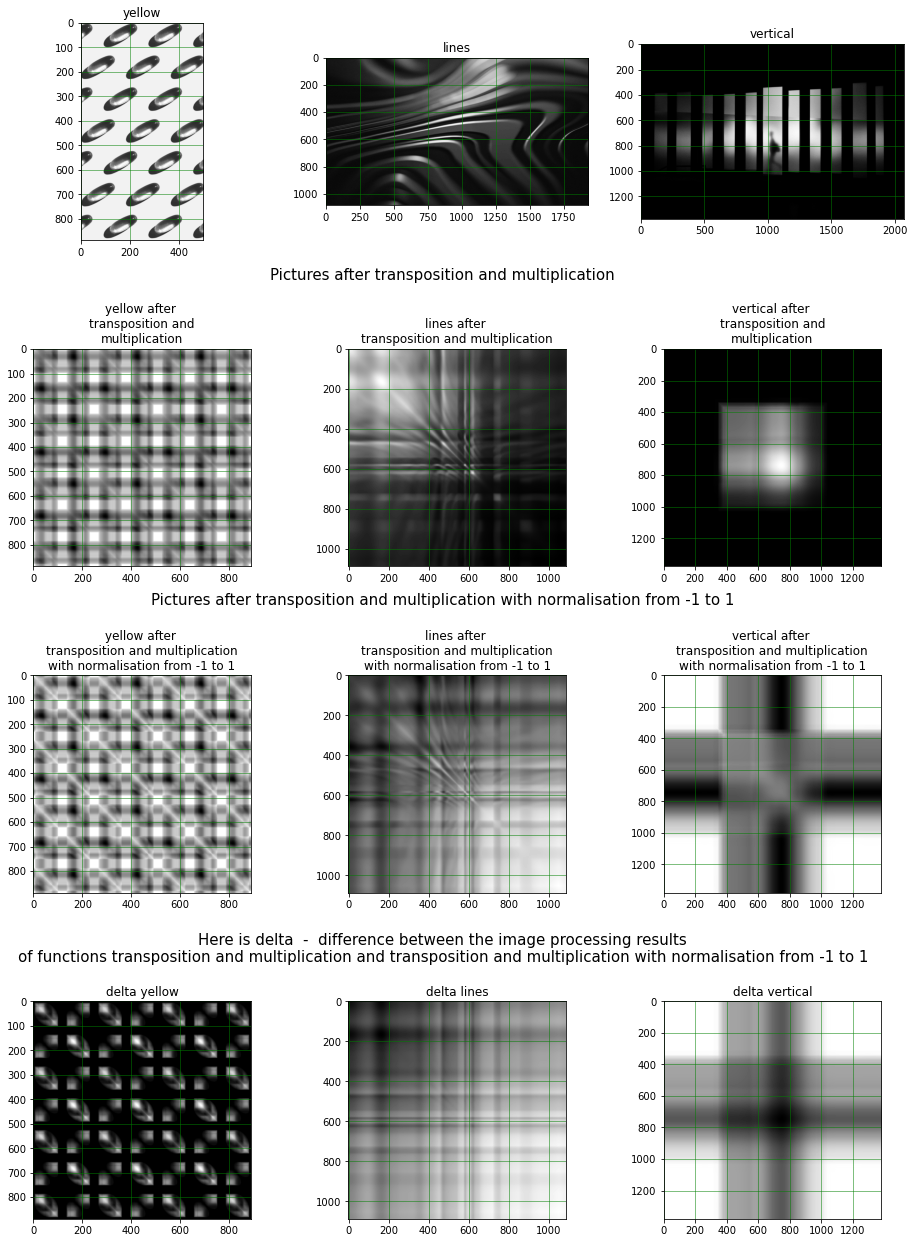

In [24]:
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
lines = io.imread('https://images.unsplash.com/photo-1704520355609-c62b0c4010df?q=80&w=1932&auto=format'
                  '&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
picture_f_1_and_f_2 (trans_mult, trans_mult_signed, 'transposition and multiplication', 
                     'transposition and multiplication with normalisation from -1 to 1', yellow, 
                     lines, vertical, 'yellow', 'lines', 
                     'vertical')

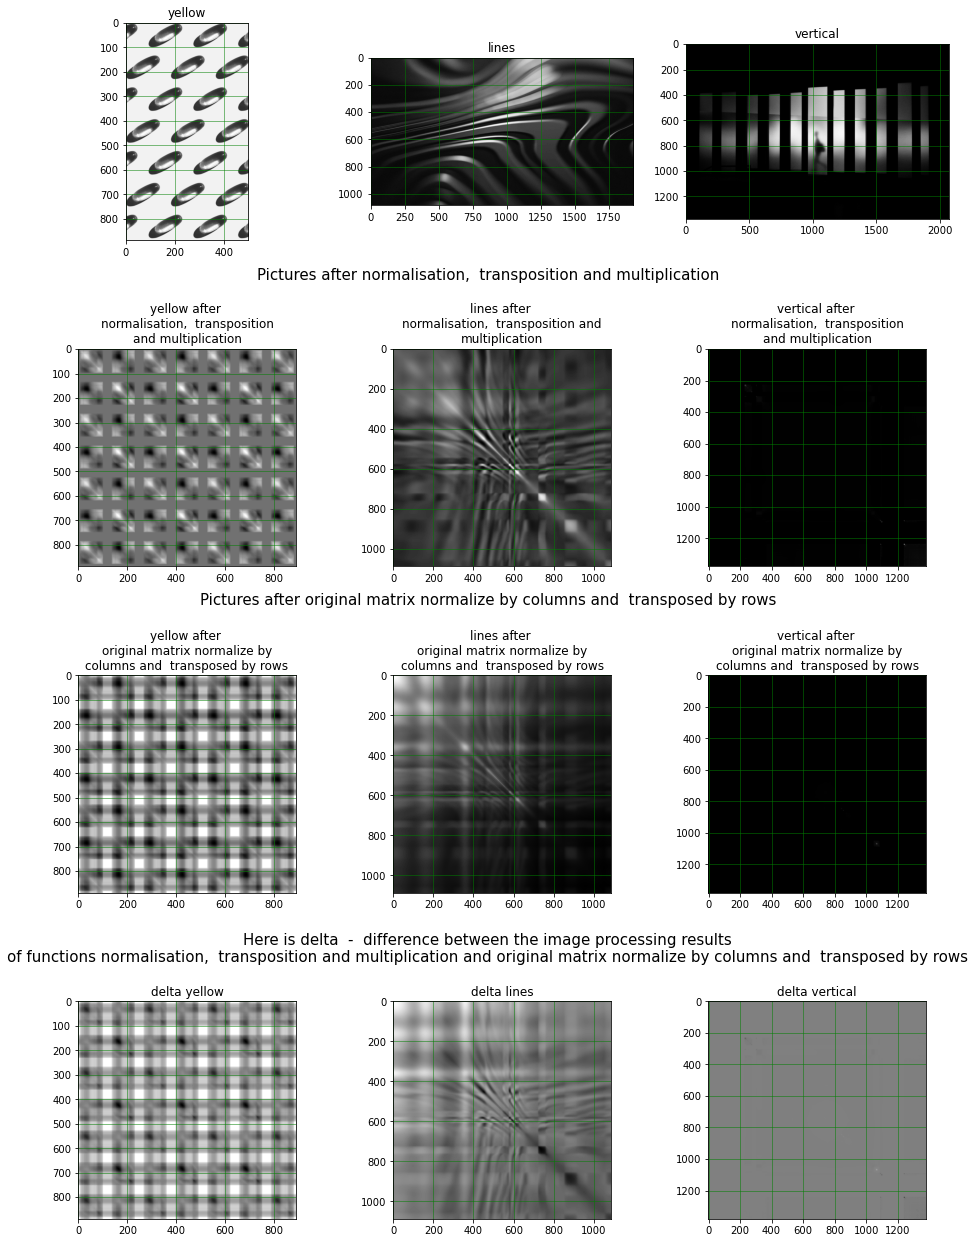

In [25]:
# Это позволит нам "проверять на интересность" вообще любые функции обратоки изображений
# возьмем с неправильной нормализацией, где мы исходную матрицу нормализуем по стоббцам, а нормализованную - по строкам
# не то, чтобы ждем чегор-то необыкновенного, просто проверить, что можно любую матрицу

def trans_mult_norm(A):
    result = normalize_image(np.dot(norm_rows(monochrome(A)), norm_columns(np.transpose(monochrome(A)))))
    return result

def trans_reverse_norm(A):
    result = normalize_image(np.dot(norm_columns(monochrome(A)), norm_rows(np.transpose(monochrome(A)))))
    return result


astro = io.imread('https://images.unsplash.com/photo-1707162798192-b32a573ca3a8?w=500&auto=format&fit=crop&q=60&ixlib='
                  'rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxMHx8fGVufDB8fHx8fA%3D%3D')

alpin = io.imread('https://images.unsplash.com/photo-1683009427041-d810728a7cb6?w=500&auto=format&fit=crop&q='
                 '60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxlZGl0b3JpYWwtZmVlZHw2fHx8ZW58MHx8fHx8')
eggs = io.imread('https://images.unsplash.com/photo-1617440168937-c6497eaa8db5?q=80&w=2070&auto'
                '=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

picture_f_1_and_f_2 (trans_mult_norm, trans_reverse_norm, 'normalisation,  transposition and multiplication', 
                     'original matrix normalize by columns and  transposed by rows', yellow, 
                     lines, vertical, 'yellow', 'lines', 
                     'vertical')